<a href="https://colab.research.google.com/github/anutishah/project_chd/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-104-ef9e191636af>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)
<ipython-input-104-ef9e191636af>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData.dropna(inplace=True)


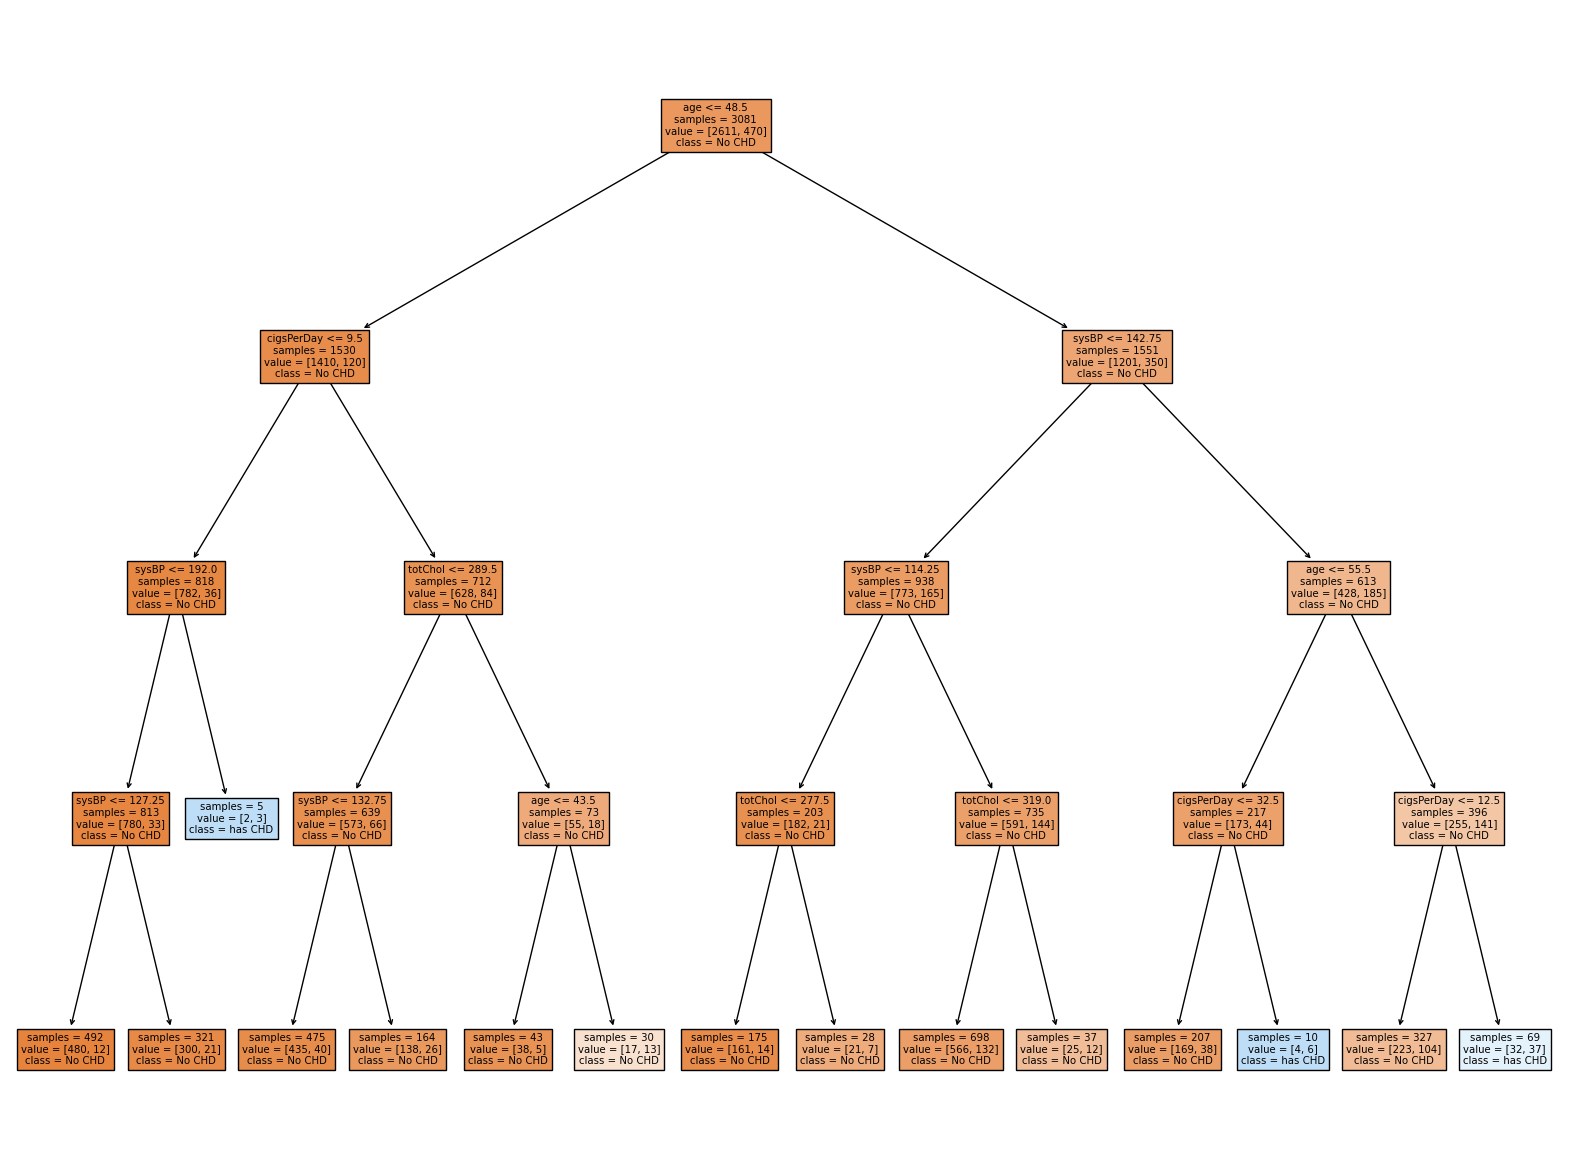

Accuracy: 0.8570038910505836


In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

#cleaned data
var_list = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
output_filename = 'selected_chd_trainingdata_tree.csv'

df_train = pd.read_csv('/content/fhs_train.csv', low_memory = False)
df_train = df_train.dropna(subset = var_list)

df_test = pd.read_csv('/content/fhs_test.csv', low_memory = False)
df_test = df_test.dropna(subset = var_list)

#print(df_train.head())

selected_features = ['age', 'currentSmoker', 'cigsPerDay', 'totChol', 'sysBP'] #variables chosen to dtermine the relationship between numeric and cat variables
target_variable = 'TenYearCHD'

# filter dataset to include only selected features and target variable
trainData = df_train[selected_features + [target_variable]]
testData = df_test[selected_features + [target_variable]]

# process data, dropped values that were NA so data can be processed
trainData.dropna(inplace=True)
testData.dropna(inplace=True)

# split training and testing data into features (X) and target variable (y)
X_train = trainData[selected_features]
y_train= trainData[target_variable]
X_test = testData[selected_features]
y_test= testData[target_variable]

#decision tree model
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,random_state=42)
clf.fit(X_train , y_train)
var_names = clf.feature_names_in_
plt.figure(figsize=(20, 15))#adjusts size to make larger
plot_tree(clf,filled=True,feature_names=var_names, class_names=['No CHD', 'has CHD'], impurity=False) #classifies decision with yes or no for CHD
plt.show()

y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Our group aimed to build a decision tree model using selected variables like age, current smoker status, cigarettes smoked per day (cigsPerDay), total cholesterol (totChol), and systolic blood pressure (sysBP) to predict whether someone has coronary heart disease (CHD) or not. These variables are known risk factors or indicators for CHD. Age is a well-established risk factor, smoking is strongly associated with increased CHD risk, and elevated levels of total cholesterol and systolic blood pressure are also significant predictors of CHD. By combining categorical and numerical data, we sought to create a model with real-life applicability, where parameters can be tuned to improve performance, and insights can be gained into how different variables contribute to CHD risk.

The decision tree model, particularly for systolic blood pressure (sysBP), achieved an accuracy of 0.857 after adjusting various parameters such as max depth and minimum sample size. The model revealed intriguing insights, such as individuals below the age of 48 who smoke less than 9 cigarettes per day but have a systolic blood pressure above 192 may still be at risk for CHD. Similarly, individuals above the age of 55 with high systolic blood pressure and a smoking habit of more than 12 cigarettes per day are also identified as at-risk.

However, the model does have some limitations. It appears to create overly complex decision rules based on rare combinations of features present only in the training data, which may hinder its generalizability to new patients. Additionally, the model may struggle to capture the imbalance in CHD risk, as it may be biased towards predicting the majority class. This could result in the overlooking of important patterns related to CHD risk in the minority class, leading to suboptimal performance in predicting CHD risk.



<ipython-input-105-deec98d95e54>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)
<ipython-input-105-deec98d95e54>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData.dropna(inplace=True)


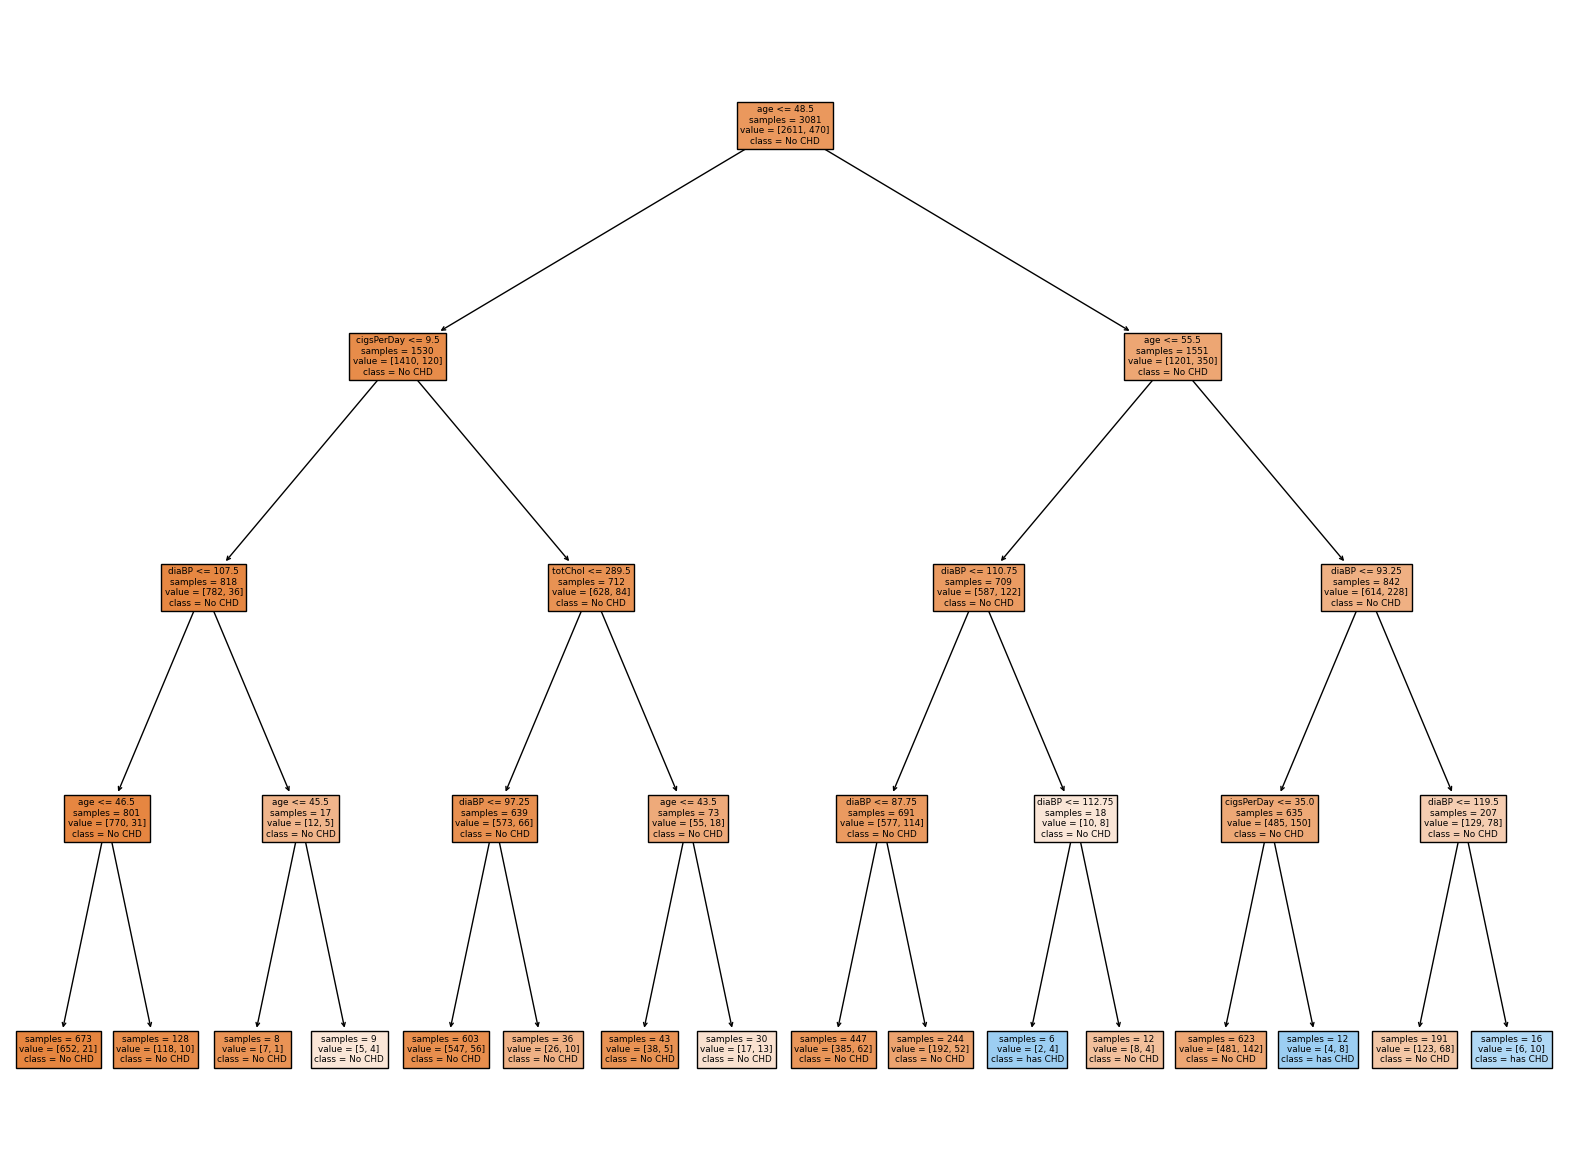

Accuracy: 0.8501945525291829


In [105]:

#cleaned data
var_list = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
output_filename = 'selected_chd_trainingdata_tree.csv'

df_train = pd.read_csv('/content/fhs_train.csv', low_memory = False)
df_train = df_train.dropna(subset = var_list)

df_test = pd.read_csv('/content/fhs_test.csv', low_memory = False)
df_test = df_test.dropna(subset = var_list)

#print(df_train.head())

selected_features = ['age', 'currentSmoker', 'cigsPerDay', 'totChol', 'diaBP'] #variables chosen to dtermine the relationship between numeric and cat variables
target_variable = 'TenYearCHD'

# filter dataset to include only selected features and target variable
trainData = df_train[selected_features + [target_variable]]
testData = df_test[selected_features + [target_variable]]

# process data, dropped values that were NA so data can be processed
trainData.dropna(inplace=True)
testData.dropna(inplace=True)

# split training and testing data into features (X) and target variable (y)
X_train = trainData[selected_features]
y_train= trainData[target_variable]
X_test = testData[selected_features]
y_test= testData[target_variable]

#decision tree model
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,random_state=42)
clf.fit(X_train , y_train)
var_names = clf.feature_names_in_
plt.figure(figsize=(20, 15))#adjusts size to make larger
plot_tree(clf,filled=True,feature_names=var_names, class_names=['No CHD', 'has CHD'], impurity=False) #classifies decision with yes or no for CHD
plt.show()

y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In further analyzing the effects of blood pressure, this decision tree replaces systolic blood pressure data with diastolic blood pressure data. We anticipate that when building a predictive model for CHD, including both systolic and diastolic blood pressure as separate features may provide a more comprehensive understanding of cardiovascular risk. Analyzing the relationship between diastolic bloop pressure and CHD risk alongside other relevant variables such as age, cholesterol levels, smoking status, and family history of heart disease can help identify individuals at higher risk and guide preventive measures and treatment strategies.

The model achieved an accuracy of 0.85. It shows that individuals above the age of 55 with diastolic blood pressure higher than 119.5, those with a lower diastolic pressure but who smoke more than 35 cigarettes per day, and those with a blood pressure between 110-112 are predicted to have a risk of CHD.

When comparing the use of systolic versus diastolic blood pressure in the models, it's important to note that systolic blood pressure represents the pressure in the arteries when the heart beats, while diastolic blood pressure represents the pressure when the heart is at rest between beats. Both measures are important indicators of cardiovascular health and can provide valuable insights into CHD risk. By including both systolic and diastolic blood pressure as separate features in the model, we can capture different aspects of blood pressure dynamics and potentially improve the accuracy of CHD risk prediction.